In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\mnist_train.csv')

In [5]:
df.shape

(60000, 785)

In [6]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [8]:
df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [12]:
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [13]:
X = data[:,1:]
Y = data[:,0]

In [15]:
split = int(0.8*data.shape[0])
print(split)

48000


In [17]:
X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split]
Y_test = Y[split:]

In [19]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [20]:
def DrawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

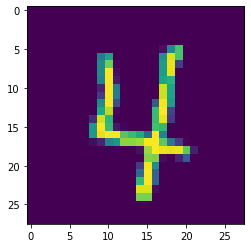

5


In [31]:
DrawImg(X_test[0])
print(Y_train[0])

In [32]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,query_point,k=5):
    vals = []
    m = x.shape[0]
    for i in range(m):
        val = dist(query_point,x[i])
        vals.append((val,y[i]))
    vals = sorted(vals)
    vals = vals[0:k]
    
    vals = np.array(vals)
    print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [33]:
pred = knn(X_train,Y_train,X_test[0])
print(int(pred))

[[1112.32818898    4.        ]
 [1128.60178983    4.        ]
 [1150.90616472    4.        ]
 [1152.01692696    4.        ]
 [1169.53922551    4.        ]]
(array([4.]), array([5], dtype=int64))
4
